In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('50_Startups.csv')

In [4]:
df.head()
#R&D Spend – расходы на разработку
#Administration – административные расходы
#Marketing Spend – маркетинговые расходы
#State – регион
#Profit - прибыль

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


_Посмотрим в каком ‘state’ максимальный profit_

In [54]:
df.groupby('State').agg({'Profit': max}, ascending = True)

,Profit
State,
California,191792.06
Florida,191050.39
New York,192261.83


_Посчитаем суммарное значение расходов (добавим столбец Summary)_

In [12]:
df['Summary'] = df['R&D Spend'] + df['Administration'] + df['Marketing Spend']
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Summary
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10
1,162597.70,151377.59,443898.53,California,191792.06,757873.82
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53


_Посчитаем долю расходов каждого вида от общих расходов (добавим три столбца с долей каждого вида расходов)_

In [5]:
df['share_R&D Spend'] = df['R&D Spend']/df['Summary']*100
df['share_Administration'] = df['Administration']/df['Summary']*100
df['share_Marketing Spend'] = df['Marketing Spend']/df['Summary']*100
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Summary,share_R&D Spend,share_Administration,share_Marketing Spend
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10,21.362087,17.686344,60.951569
1,162597.70,151377.59,443898.53,California,191792.06,757873.82,21.454455,19.973983,58.571561
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60,23.160228,15.266755,61.573017
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88,22.340236,18.363323,59.296441
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53,23.697688,15.240407,61.061905


_Посчитаем количество компаний для каждого ‘state’, у которых значение profit больше медианного для:
А) данного state
Б) всего датасета_

In [8]:
median_Cl = df.query("State == 'California'").Profit.median()
median_Cl

97427.84

In [7]:
California_profit = df[df['Profit'] > median_Cl]
California_profit[California_profit['State'] == 'California']

,R&D Spend,Administration,Marketing Spend,State,Profit,Summary,share_R&D Spend,share_Administration,share_Marketing Spend
1,162597.70,151377.59,443898.53,California,191792.06,757873.82,21.454455,19.973983,58.571561
6,134615.46,147198.87,127716.82,California,156122.51,409531.15,32.870628,35.943266,31.186106
9,123334.88,108679.17,304981.62,California,149759.96,536995.67,22.967574,20.238370,56.794056
11,100671.96,91790.61,249744.55,California,144259.40,442207.12,22.765794,20.757379,56.476827
13,91992.39,135495.07,252664.93,California,134307.35,480152.39,19.158999,28.219181,52.621821
16,78013.11,121597.55,264346.06,California,126992.93,463956.72,16.814739,26.208813,56.976448
20,76253.86,113867.30,298664.47,California,118474.03,488785.63,15.600675,23.295959,61.103365
25,64664.71,139553.16,137962.62,California,107404.34,342180.49,18.897837,40.783494,40.318669


In [10]:
median_Fl = df.query("State == 'Florida'").Profit.median()
median_Fl

109543.12

In [11]:
Florida_profit = df[df['Profit'] > median_Fl]
Florida_profit[Florida_profit['State'] == 'Florida']

,R&D Spend,Administration,Marketing Spend,State,Profit,Summary,share_R&D Spend,share_Administration,share_Marketing Spend
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60,23.160228,15.266755,61.573017
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53,23.697688,15.240407,61.061905
7,130298.13,145530.06,323876.68,Florida,155752.60,599704.87,21.727042,24.266947,54.006011
10,101913.08,110594.11,229160.95,Florida,146121.95,441668.14,23.074583,25.040092,51.885325
12,93863.75,127320.38,249839.44,Florida,141585.52,471023.57,19.927612,27.030575,53.041813
14,119943.24,156547.42,256512.92,Florida,132602.65,533003.58,22.503271,29.370801,48.125928
18,91749.16,114175.79,294919.57,Florida,124266.90,500844.52,18.318891,22.796654,58.884456
22,73994.56,122782.75,303319.26,Florida,110352.25,500096.57,14.796054,24.551808,60.652138


In [13]:
median_NY = df.query("State == 'New York'").Profit.median()
median_NY

108552.04

In [14]:
New_York_profit = df[df['Profit'] > median_NY]
New_York_profit[New_York_profit['State'] == 'New York']

,R&D Spend,Administration,Marketing Spend,State,Profit,Summary,share_R&D Spend,share_Administration,share_Marketing Spend
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10,21.362087,17.686344,60.951569
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88,22.340236,18.363323,59.296441
5,131876.90,99814.71,362861.36,New York,156991.12,594552.97,22.180850,16.788195,61.030956
8,120542.52,148718.95,311613.29,New York,152211.77,580874.76,20.751895,25.602584,53.645521
15,114523.61,122616.84,261776.23,New York,129917.04,498916.68,22.954456,24.576617,52.468927
17,94657.16,145077.58,282574.31,New York,125370.37,522309.05,18.122826,27.776195,54.100979
19,86419.70,153514.11,0.00,New York,122776.86,239933.81,36.018142,63.981858,0.000000
21,78389.47,153773.43,299737.29,New York,111313.02,531900.19,14.737628,28.910204,56.352168


In [16]:
df_median = df.Profit.median()
df_median

107978.19

In [17]:
df_profit = df[df['Profit'] > df_median]
df_profit

,R&D Spend,Administration,Marketing Spend,State,Profit,Summary,share_R&D Spend,share_Administration,share_Marketing Spend
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10,21.362087,17.686344,60.951569
1,162597.70,151377.59,443898.53,California,191792.06,757873.82,21.454455,19.973983,58.571561
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60,23.160228,15.266755,61.573017
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88,22.340236,18.363323,59.296441
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53,23.697688,15.240407,61.061905
5,131876.90,99814.71,362861.36,New York,156991.12,594552.97,22.180850,16.788195,61.030956
6,134615.46,147198.87,127716.82,California,156122.51,409531.15,32.870628,35.943266,31.186106
7,130298.13,145530.06,323876.68,Florida,155752.60,599704.87,21.727042,24.266947,54.006011
8,120542.52,148718.95,311613.29,New York,152211.77,580874.76,20.751895,25.602584,53.645521
9,123334.88,108679.17,304981.62,California,149759.96,536995.67,22.967574,20.238370,56.794056


_Создадим таблицу: количество компаний по каждому state, у которых процент маркетинговых расходов больше 40% от общего числа расходов и profit более 45-перцентиля по всему датасету. 
Построим график barchart – ось x - state, y - средний profit по таким компаниям._

In [46]:
percent_MA = df['Marketing Spend'] / df['Summary'] > 0.4

In [47]:
perc_arr=np.percentile(df.Profit, [45])
percent_profit = df['Profit'] > perc_arr[0]

In [84]:
filter_df = df.loc[percent_MA & percent_profit]

In [78]:
pivot_df = filter_df[['State', 'Profit']]
pivot_df

,State,Profit
0,New York,192261.83
1,California,191792.06
2,Florida,191050.39
3,New York,182901.99
4,Florida,166187.94
5,New York,156991.12
7,Florida,155752.60
8,New York,152211.77
9,California,149759.96
10,Florida,146121.95


In [123]:
pivot_df.groupby('State').agg({'State':['count'],'Profit': 'mean'}).reset_index()

State               Profit
              count           mean
0  California     7  138998.581429
1     Florida     9  141850.465556
2    New York     8  144939.897500

In [124]:
df_for_barchart = pivot_df.groupby('State').agg({'Profit': 'mean'}).reset_index()
df_for_barchart

,State,Profit
0,California,138998.581429
1,Florida,141850.465556
2,New York,144939.897500


Text(0.5, 1.0, 'Profit by State')

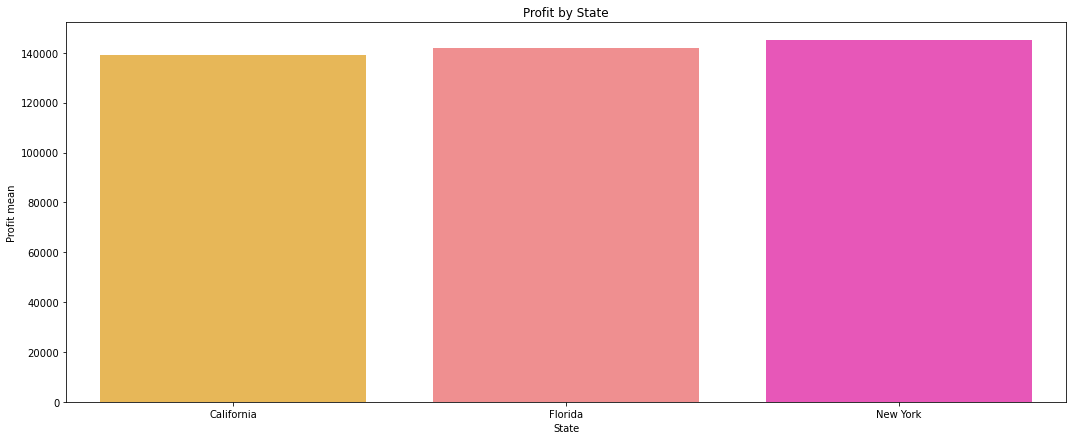

In [130]:
plt.figure(figsize = (15,6))
sns.barplot(x= 'State', y = 'Profit', data = df_for_barchart, palette = 'spring_r')
plt.tight_layout()
plt.xlabel('State')
plt.ylabel('Profit mean')
plt.title('Profit by State')

_Построим корреляционную матрицу для показателей различных видов расходов и прибыли_

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import scipy.special as sps
import warnings

In [8]:
research_list = ["R&D Spend", "Administration", "Marketing Spend", "Profit", "Summary"]

In [9]:
corr_m = df[research_list].corr()
corr_m

,R&D Spend,Administration,Marketing Spend,Profit,Summary
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.869663
Administration,0.241955,1.000000,-0.032154,0.200717,0.216674
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,0.952069
Profit,0.972900,0.200717,0.747766,1.000000,0.872598
Summary,0.869663,0.216674,0.952069,0.872598,1.000000


<AxesSubplot:>

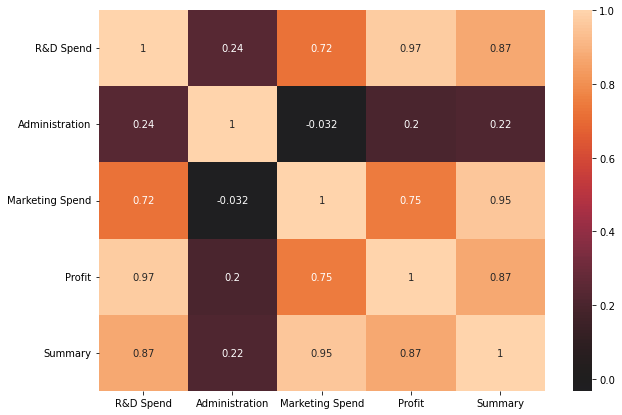

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(corr_m, center=0, annot=True)

Коэффициент корреляции 0.9729004656594832


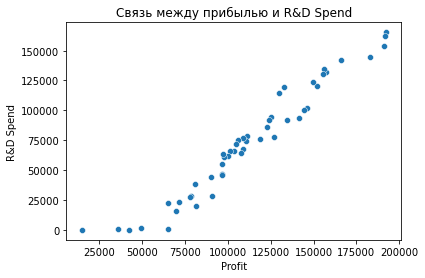

Коэффициент корреляции 0.7477657217414767


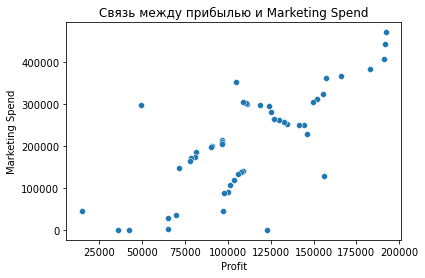

In [14]:
level > 0.5
for i in research_list[:-2]:
    curr_corr = df[i].corr(df.Profit)
    if abs(curr_corr) >= level:
        sns.scatterplot(x="Profit", y=i, data=df)
        print("Коэффициент корреляции " + str(curr_corr))
        plt.title("Связь между прибылью и "+str(i))
        plt.show()

Наглядно видим связь между прибылью и расходами на разработку, а также с маркетинговыми расходами.

_Построим линейные регрессионные модели_

In [134]:
train = pd.read_csv('50_Startups.csv')

In [69]:
#проверка нулевых значений
train.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [135]:
X = train[['R&D Spend']]
Y = train[['Profit']]

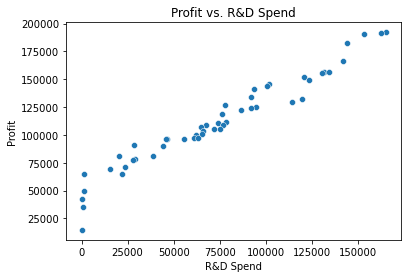

In [72]:
#строим scatter plot
sns.scatterplot(data=train,x='R&D Spend',y='Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('Profit vs. R&D Spend')
plt.show()

In [133]:
from sklearn.linear_model import LinearRegression

In [74]:
reg = LinearRegression()
model = reg.fit(X, Y)

In [75]:
#B0 value
model.intercept_

array([49032.89914125])

In [76]:
#B1 value
model.coef_

array([[0.85429137]])

In [77]:
model.score(X,Y)
#r2

0.9465353160804392

In [78]:
#зависимость корелляции высокая

у=49032+0.85*х уравнение 

In [89]:
model.intercept_ + model.coef_*51

array([[49076.46800117]])

- В данном случае r2 = 0,94 (по шкале Чеддока связь высокая — от 0,7 до 0,9).

- Вариация прибыли объясняется на 94% моделью и остальная часть - неучтенными в модели факторами.


- При увеличении на 1 фактора ' R&D Spend', прибыль (Profit) увеличится на 0.94

In [143]:
X_2 = train[['Marketing Spend']]
Y = train[['Profit']]

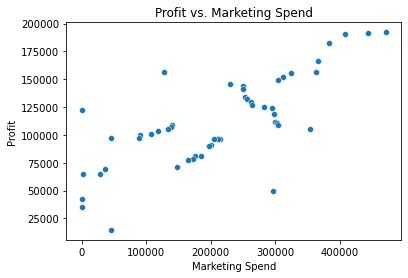

In [91]:
#строим scatter plot
sns.scatterplot(data=train,x='Marketing Spend',y='Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Profit vs. Marketing Spend')
plt.show()

In [92]:
reg = LinearRegression()
model = reg.fit(X_2, Y)

In [93]:
#B0 value
model.intercept_

array([60003.54881577])

In [94]:
#B1 value
model.coef_

array([[0.24645926]])

In [95]:
model.score(X_2,Y)
#r2

0.5591535746115515

- В нашем случае r2 = 0,55 (по шкале Чеддока 0,5-0,7 заметная сила связи).

- Вариация прибыли объясняется на 55% моделью и остальная часть - неучтенными в модели факторами.

In [96]:
model.intercept_ + model.coef_*51

array([[60016.11823826]])

- На каждую единицу изменения в изученном показателе Marketing Spend (Маркетинговые расходы) изменение прибыли (Profit) составляет около 0.24


- При увеличении на 1 фактора 'Marketing Spend', прибыль увеличится на 0.24

In [136]:
X_3 = train[['Administration']]
Y = train[['Profit']]

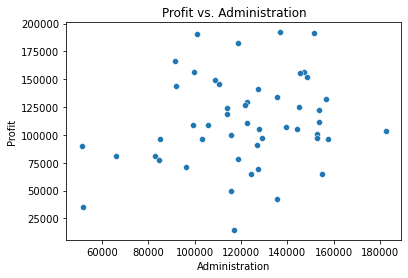

In [137]:
#строим scatter plot
sns.scatterplot(data=train,x='Administration',y='Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.title('Profit vs. Administration')
plt.show()

In [138]:
reg = LinearRegression()
model = reg.fit(X_3, Y)

In [139]:
#B0 value
model.intercept_

array([76974.47130542])

In [140]:
#B1 value
model.coef_

array([[0.2887492]])

In [142]:
model.score(X_3,Y)
#r2

0.04028714077757223

r2 = 0.04 По шкале Чеддока, можем сделать вывод, что связь между Аминистративными расходами и прибылью практичеси отсутствует.

_Построим модель множественной регрессии_

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
X_4 = df[["R&D Spend", "Administration", "Marketing Spend", "Summary"]]

In [14]:
Y_4 = df.Profit

In [15]:
X_4 = sm.add_constant(X_4)  # добавить константу, чтобы был свободный член
model = sm.OLS(Y_4, X_4)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую
print(results.summary())  # смотрим результат

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           4.53e-30
Time:                        09:07:19   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.012e+04   6572.353     

- При множественном анализе оцениваем Adj. R-squared: 0.948


- Выбранная модель объясняет примерно 95 % дисперсии (окр. до целого). 


- При единичном изменении показателя R&D Spend, прибыль (Profit) увеличивается на 0.6042, а также можем заметить отрицательную связь между административными/маркетинговыми расходами и прибылью.


- __Исходя из полученных данных в линейных регрессионных моделях, можем с уверенностью сказать, что на увеличение прибыли очень сильно влияют расходы на разработку и в меньшей степени маркетинговые расходы и административные расходы.__